# Table of Contents
 <p><div class="lev1 toc-item"><a href="#OSMI-Health-Survey-2016:-Model-Selection" data-toc-modified-id="OSMI-Health-Survey-2016:-Model-Selection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OSMI Health Survey 2016: Model Selection</a></div><div class="lev1 toc-item"><a href="#Post-Processing-Summary" data-toc-modified-id="Post-Processing-Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Post-Processing Summary</a></div>

# OSMI Health Survey 2016: Model Selection

_By [Michael Rosenberg](mailto:mmrosenb@andrew.cmu.edu)._

_**Description**: Contains my model select related to the [OSMI Mental Health In Tech Survey 2016](https://osmihelp.org/research/). This notebook is written in `R`._

In [6]:
#imports
library(tree)

In [7]:
#read in the data
mainFrame = read.csv("../data/processed/procDataset.csv")

# Post-Processing Summary

After processing the dataset using [../code/cleanDataset.py](../code/cleanDataset.py), we are left with a certain set of variables:

* ```diagnosedWithMHD```: This is our main target variable. This is the variable that indicates whether an individual has been diagnosed with a mental health disorder by a medical professional.

* ```workPosString```: This is a string that contains all the job descriptions of each respondent. Each of these job descriptions 

In [8]:
colnames(mainFrame)

[1] "roleType"         "workState"        "companySize"      "workPosString"   
[5] "age"              "diagnosedWithMHD" "gender"           "workCountry"

In [39]:
mainFrame$isUSA = "No"
mainFrame[which(mainFrame$workCountry == "United States of America"),
          "isUSA"]="Yes"
newTree = tree(diagnosedWithMHD ~ age + roleType + isUSA + gender
                           + companySize,data = mainFrame,split = "deviance")

Warning message:
In tree(diagnosedWithMHD ~ age + roleType + isUSA + gender + companySize, : NAs introduced by coercion

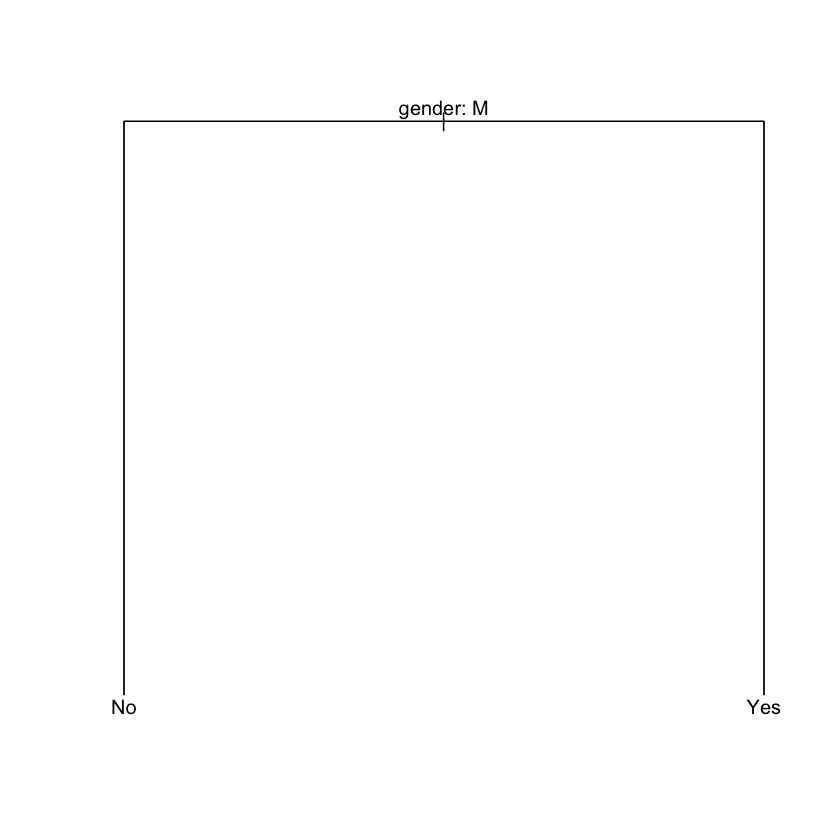

In [40]:
plot(newTree)
text(newTree,pretty = 0)